In [307]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from PIL import Image
from os import listdir
from os.path import isfile, join
import cv2
import matplotlib.pyplot as plt



mypath='yalefaces/'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
imgdatabase = []
subject_mapping = {}
per = []

for n in range(0, len(onlyfiles)):
    images = Image.open(join(mypath,onlyfiles[n]))
    images.save(onlyfiles[n]+".jpg", quality=95)
    jpgimages=cv2.imread(onlyfiles[n]+".jpg")
    jpgimages = jpgimages[:,:,0]
    jpgimages=cv2.resize(jpgimages, (100,100))
    jpgimages=np.ravel(jpgimages)
    imgdatabase.append(jpgimages)
    #subject_mapping[onlyfiles[n]]=n
    per.append(onlyfiles[n][7:9])

mypath='image_yale_test/'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]
test = []
per_test = []


for n in range(0, len(onlyfiles)):
    images = Image.open(join(mypath,onlyfiles[n]))
    images.save(onlyfiles[n]+".jpg", quality=95)
    jpgimages=cv2.imread(onlyfiles[n]+".jpg")
    jpgimages = jpgimages[:,:,0]
    jpgimages=cv2.resize(jpgimages, (100,100))
    jpgimages=np.ravel(jpgimages)
    test.append(jpgimages)
    per_test.append(onlyfiles[n][7:9])


In [309]:
import pandas as pd
import random
imgdatabase = np.array(imgdatabase)
train = pd.DataFrame(imgdatabase)
#train_t = pd.DataFrame(imgdatabase.T)

id_col = pd.DataFrame({'id' : per})
col = pd.concat([train, id_col], axis=1)

col = col.reindex(np.random.permutation(col.index))
#print(col)


X_train = col.drop(['id'], axis=1, inplace=False)
y_train = col['id']

#print(y_train)

test = np.array(test)
test = pd.DataFrame(test)

print(test[0])

id_coltest = pd.DataFrame({'id' : per_test})
col_test = pd.concat([test, id_coltest], axis=1)
col_test = col_test.reindex(np.random.permutation(col_test.index))
print(col_test)

X_test = col_test.drop(['id'], axis=1, inplace=False)
y_test = col_test['id']

0     219
1     205
2     219
3     219
4     218
5     183
6     219
7     219
8     219
9     219
10    219
11    215
12    219
13    219
14    219
Name: 0, dtype: uint8
      0    1    2    3    4    5    6    7    8    9 ...  9991  9992  9993  \
8   219  219  219  219  219  219  219  219  219  219 ...   191   173   195   
13  219  219  218  215  219  219  219  219  219  219 ...   201   201   201   
7   219  219  219  219  219  219  219  219  219  219 ...   195   172   192   
11  215  219  219  219  214  217  217  219  215  219 ...   126   126   133   
9   219  219  219  219  219  219  219  219  219  219 ...   178   195   200   
10  219  219  219  219  219  219  219  219  219  219 ...   102    99   111   
5   183  216  219  217  202  220  219  217  218  219 ...   190   200   192   
4   218  219  218  219  219  219  219  219  219  219 ...   200   161   108   
2   219  219  219  219  219  219  219  219  219  219 ...   201   201   201   
12  219  219  219  219  219  219  219  219  219 

In [310]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
train_X = scaler.transform(X_train)
test_X = scaler.transform(X_test)

In [311]:
from sklearn.decomposition import PCA

pca = PCA(.95)
#pca.fit(X_train)

X_train_pca = pca.fit_transform(train_X)
X_test_pca = pca.transform(test_X)

approximate = pca.inverse_transform(X_train_pca)
approx = scaler.inverse_transform(approximate)

c:\users\admin\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


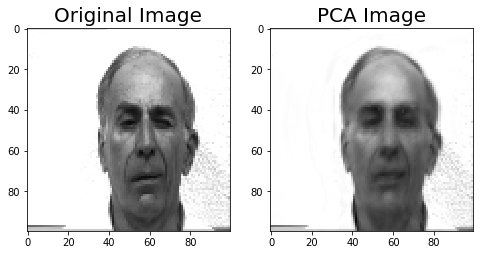

In [312]:
plt.figure(figsize=(8,4));

plt.subplot(1, 2, 1);
plt.imshow(X_train.iloc[4].reshape(100,100),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.title('Original Image', fontsize = 20);

plt.subplot(1, 2, 2);
plt.imshow(approx[4].reshape(100,100),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.title('PCA Image', fontsize = 20);

In [313]:
pca_var = PCA()
pca_var.fit(train_X)
print(pca_var.n_components_)
# Summing explained variance
tot = sum(pca_var.explained_variance_)
print(tot)
var_exp = [(i/tot)*100 for i in sorted(pca_var.explained_variance_, reverse=True)] 
print(var_exp[0:5])

10000
10066.666666666666
[27.721151147020183, 17.213097944467908, 9.087052003064457, 6.87822670910543, 3.7392271798287595]


In [314]:
# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

In [315]:
componentsVariance = [10000, np.argmax(cum_var_exp > 99) + 1, np.argmax(cum_var_exp > 95) + 1, np.argmax(cum_var_exp > 90) + 1, np.argmax(cum_var_exp >= 85) + 1]

In [316]:
print(componentsVariance)

[10000, 98, 49, 28, 19]


In [317]:
def explainedVariance(percentage, images): 
    # percentage should be a decimal from 0 to 1 
    pca_var = PCA(percentage)
    pca_var.fit(images)
    components = pca_var.transform(images)
    approxOriginal = pca_var.inverse_transform(components)
    return approxOriginal

c:\users\admin\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


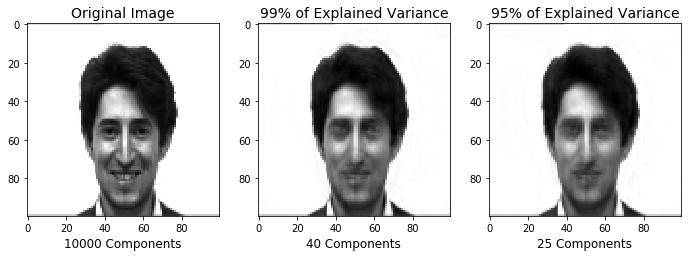

In [318]:
plt.figure(figsize=(20,4));

# Original Image (784 components)
plt.subplot(1, 5, 1);
plt.imshow(X_train.iloc[5].reshape(100,100),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('10000 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14);

# 331 principal components
plt.subplot(1, 5, 2);
plt.imshow(explainedVariance(.99, X_train)[5].reshape(100,100),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('40 Components', fontsize = 12)
plt.title('99% of Explained Variance', fontsize = 14);

# 154 principal components
plt.subplot(1, 5, 3);
plt.imshow(explainedVariance(.95, X_train)[5].reshape(100,100),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('25 Components', fontsize = 12)
plt.title('95% of Explained Variance', fontsize = 14);


In [319]:
from sklearn.decomposition import PCA

pca = PCA(n_components=97)
#pca.fit(X_train)

X_train_pca = pca.fit_transform(train_X)
X_test_pca = pca.transform(test_X)

approximate = pca.inverse_transform(X_train_pca)
approx = scaler.inverse_transform(approximate)

c:\users\admin\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


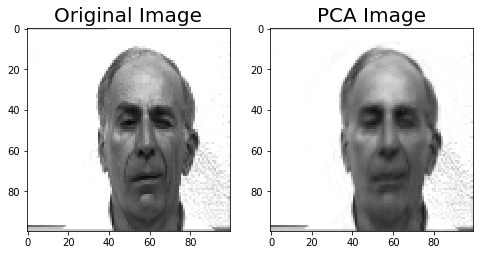

In [320]:
plt.figure(figsize=(8,4));

plt.subplot(1, 2, 1);
plt.imshow(X_train.iloc[4].reshape(100,100),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.title('Original Image', fontsize = 20);

plt.subplot(1, 2, 2);
plt.imshow(approx[4].reshape(100,100),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.title('PCA Image', fontsize = 20);

In [321]:
#Defining and training of the neural neural network
model = models.Sequential()
layers = 1
units = 108

#Input layer
model.add(Dense(units, input_dim=97, activation='relu'))

#Hidden Layer
for i in range(layers):
    model.add(Dense(units, activation='relu'))
    model.add(Dropout(0.1))
    
#Output layer
model.add(Dense(40, activation='softmax'))

#Building model
model.compile(loss='sparse_categorical_crossentropy', optimizer='Rmsprop', metrics=['accuracy'])

#Training model
model.fit(X_train_pca,y_train,batch_size=20,validation_split=0.2,epochs=30,verbose=2)



Train on 120 samples, validate on 31 samples
Epoch 1/30
 - 3s - loss: 8.5339 - acc: 0.0917 - val_loss: 4.6946 - val_acc: 0.2258
Epoch 2/30
 - 0s - loss: 3.5009 - acc: 0.4667 - val_loss: 3.1633 - val_acc: 0.4194
Epoch 3/30
 - 0s - loss: 1.6095 - acc: 0.6917 - val_loss: 2.6017 - val_acc: 0.5484
Epoch 4/30
 - 0s - loss: 1.0411 - acc: 0.8333 - val_loss: 2.4851 - val_acc: 0.5806
Epoch 5/30
 - 0s - loss: 0.8060 - acc: 0.8500 - val_loss: 2.5088 - val_acc: 0.5484
Epoch 6/30
 - 0s - loss: 0.5117 - acc: 0.9167 - val_loss: 2.2466 - val_acc: 0.5806
Epoch 7/30
 - 0s - loss: 0.3797 - acc: 0.9333 - val_loss: 2.3521 - val_acc: 0.5806
Epoch 8/30
 - 0s - loss: 0.1879 - acc: 0.9583 - val_loss: 2.4876 - val_acc: 0.5484
Epoch 9/30
 - 0s - loss: 0.0990 - acc: 0.9750 - val_loss: 2.5086 - val_acc: 0.6129
Epoch 10/30
 - 0s - loss: 0.1423 - acc: 0.9500 - val_loss: 2.4824 - val_acc: 0.6452
Epoch 11/30
 - 0s - loss: 0.0587 - acc: 0.9833 - val_loss: 2.4342 - val_acc: 0.6774
Epoch 12/30
 - 0s - loss: 0.0724 - acc: 

In [327]:
predictions = model.predict_classes(X_test_pca, verbose=0)
print(predictions)

[ 9 14  8 12 10 11  6  5  3 13  1  7  4  2 15]


In [346]:
print("PREDICTIONS")
for i in range (0,len(predictions)):
        print(y_test[predictions[i]-1])

print("ACTUAL VALUES")       
print(y_test.values)
    
        

PREDICTIONS
09
14
08
12
10
11
06
05
03
13
01
07
04
02
15
ACTUAL VALUES
['09' '14' '08' '12' '10' '11' '06' '05' '03' '13' '01' '07' '04' '02'
 '15']


In [343]:
print(y_test[1])

02


c:\users\admin\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


TypeError: bad argument type for built-in operation